In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv('Data/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [4]:
df.shape

(6000, 785)

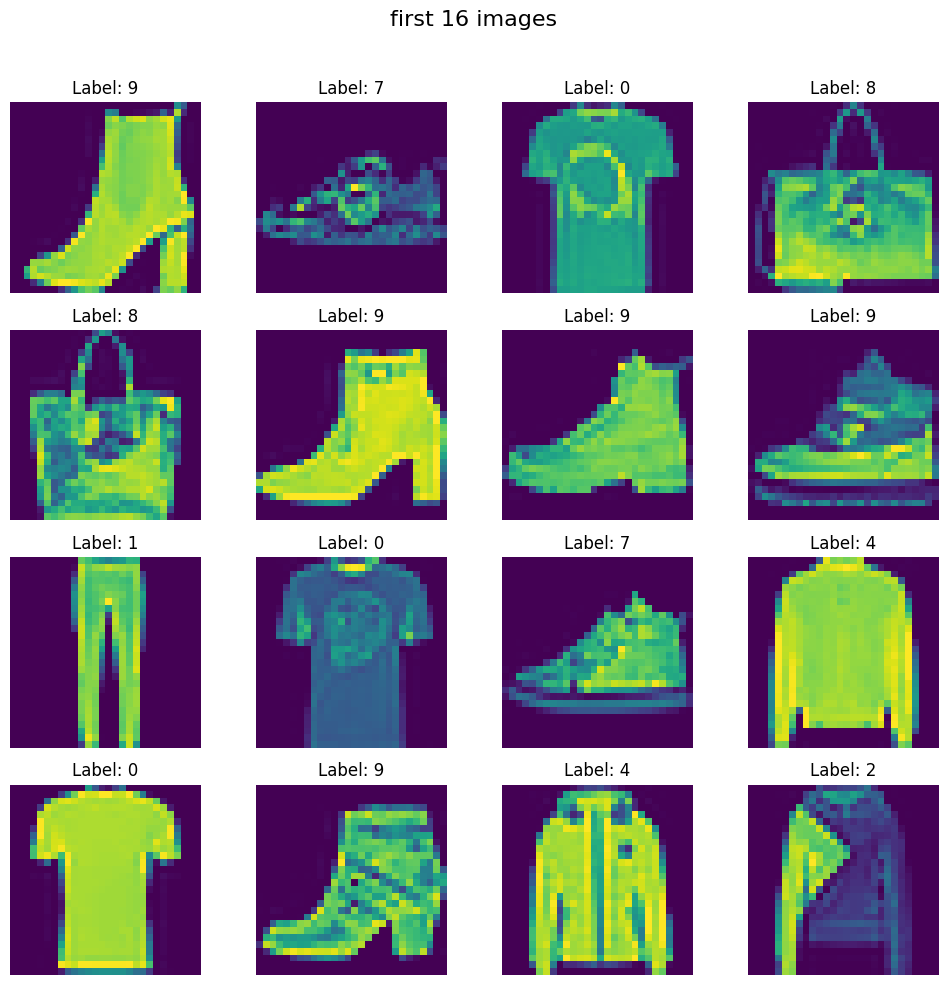

In [5]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("first 16 images",fontsize=16)

for i,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# scaled from 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
# Creating CustomDataset

class CustomDataset(Dataset):

    def __init__(self, features, labels):

        self.features=torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __getitem__(self,index):

        return self.features[index],self.labels[index]
    
    def __len__(self):
        return self.features.shape[0]

In [10]:
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [11]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=True)

In [12]:
class MyNN(nn.Module):

    def __init__(self,num_features):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    # softmax is defined implicitly , no need to define explicitly

    def forward(self,features):

        return self.network(features)

In [13]:
lr=0.04
epochs=100

In [14]:
model = MyNN(X_train.shape[1])

loss_f = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [15]:
for epoch in range(epochs):

    total_epoch_loss=0
    for batch_features,batch_labels in train_loader:
        y_pred = model(batch_features)

        loss = loss_f(y_pred,batch_labels)
        total_epoch_loss+=loss.item()

        # backpass
        optimizer.zero_grad()
        loss.backward()
        # update_weights
        optimizer.step()
    print((total_epoch_loss/len(train_loader)),epoch)

1.7375957036018372 0
0.9506669322649638 1
0.773662757674853 2
0.6931004945437114 3
0.6326329497496287 4
0.6020485265056292 5
0.561971253156662 6
0.5299048379063607 7
0.5132511319716772 8
0.49207026173671087 9
0.47568068514267603 10
0.47144946197668713 11
0.4435531794031461 12
0.436397279103597 13
0.41245674053827924 14
0.4126736855506897 15
0.3921862580875556 16
0.3862484423319499 17
0.3736168781419595 18
0.3601843312382698 19
0.3527841663360596 20
0.3437361836433411 21
0.33404924735426905 22
0.32291651735703153 23
0.3112037388483683 24
0.30769359866778057 25
0.3048945707579454 26
0.29536920636892317 27
0.2794064426173766 28
0.2780600639184316 29
0.2789698545883099 30
0.27049686993161837 31
0.2619497362524271 32
0.25650824497143426 33
0.24423826699455578 34
0.24770146079361438 35
0.23937312707304956 36
0.22508912811676662 37
0.2275976587831974 38
0.21728103319182993 39
0.22037019645174344 40
0.21377572931349278 41
0.20008616196612516 42
0.2078621590634187 43
0.19522441645463307 44
0.19

In [16]:
# evaluation
model.eval()

MyNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [17]:
total=0
correct=0
# The torch.max function returns two things:
#   (The maximum values,The indices of those maximum values)
with torch.no_grad():
    for batch_features,batch_labels in test_loader:

        outputs=model(batch_features)
        _,predicted=torch.max(outputs,1)
        total = total + batch_labels.shape[0]

        correct = correct + (predicted==batch_labels).sum().item()

print(correct/total)

0.8258333333333333
